In [1]:
!pip install ultralytics==8.0.196 --quiet

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5519.7/8062.4 GB disk)


In [2]:
from ultralytics import YOLO
yolo = YOLO("yolov8s.pt")

In [3]:
ROBOFLOW_API_KEY = None

try:
    from google.colab import userdata
    print("Running in Colab")

    ROBOFLOW_API_KEY = userdata.get("ROBOFLOW_API_KEY")
except ImportError:
    try:
        from kaggle_secrets import UserSecretsClient
        print("Running in Kaggle")

        user_secrets = UserSecretsClient()
        ROBOFLOW_API_KEY = user_secrets.get_secret("ROBOFLOW_API_KEY")
        
    except ImportError:
        print("Running Locally. Please use a .env file to define API key")
        
        !pip install python-dotenv

        import os
        from dotenv import load_dotenv
        load_dotenv()

        ROBOFLOW_API_KEY = os.environ.get("ROBOFLOW_API_KEY")

Running in Kaggle


In [4]:
!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("home-fdldn").project("drowsiness-n7to0")
version = project.version(1)
dataset = version.download("yolov8")

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.1.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.1 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is i

In [7]:
!yolo task=detect mode=train project=report name=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 batch=8 save=True

New https://pypi.org/project/ultralytics/8.1.34 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Drowsiness-1/data.yaml, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=report, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=Fa

In [10]:
# use stream_buffer=True to predict on all frames of youtube video source
!yolo task=detect mode=predict name=predict model=report/train3/weights/best.pt conf=0.55 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/37 /kaggle/working/Drowsiness-1/test/images/yt-R2eYjMuKiXQ-0012_jpg.rf.41d9a65c3cc2cab1fbe57f749b6b0791.jpg: 640x640 1 drowsy, 16.3ms
image 2/37 /kaggle/working/Drowsiness-1/test/images/yt-R2eYjMuKiXQ-0023_jpg.rf.4058d2ff15bdd785e3ad25389290cfd0.jpg: 640x640 1 awake, 16.4ms
image 3/37 /kaggle/working/Drowsiness-1/test/images/yt-R2eYjMuKiXQ-0025_jpg.rf.910cdc9272478301163b101d4225e13f.jpg: 640x640 1 drowsy, 16.4ms
image 4/37 /kaggle/working/Drowsiness-1/test/images/yt-R2eYjMuKiXQ-0042_jpg.rf.bdd3f92fb4669f73555289b18922ae1b.jpg: 640x640 1 drowsy, 16.4ms
image 5/37 /kaggle/working/Drowsiness-1/test/images/yt-R2eYjMuKiXQ-0064_jpg.rf.ae3bfd62d401a795634c6b4e5c23a9ea.jpg: 640x640 1 drowsy, 16.4ms
image 6/37 /kaggle/working/Drowsiness-1/test/images/yt-R2eYjMuKiXQ-0088_jpg.rf.164823

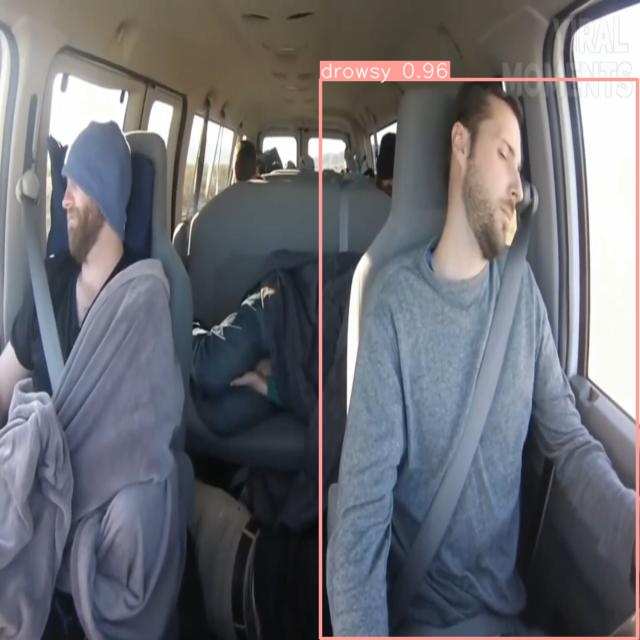

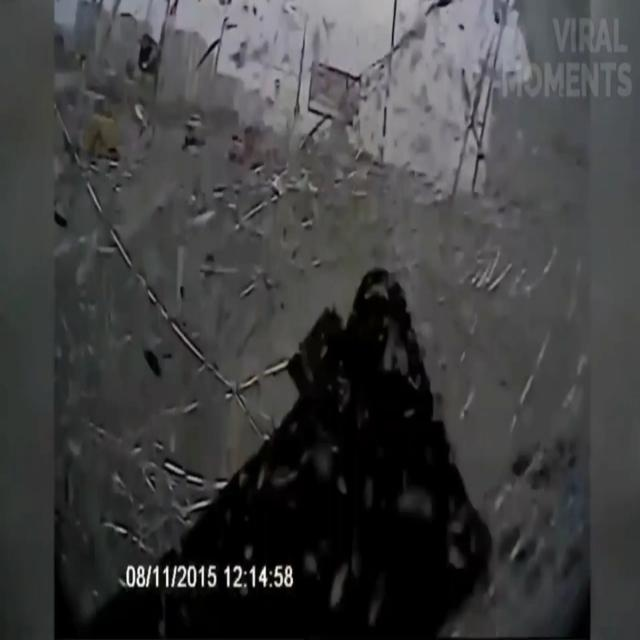

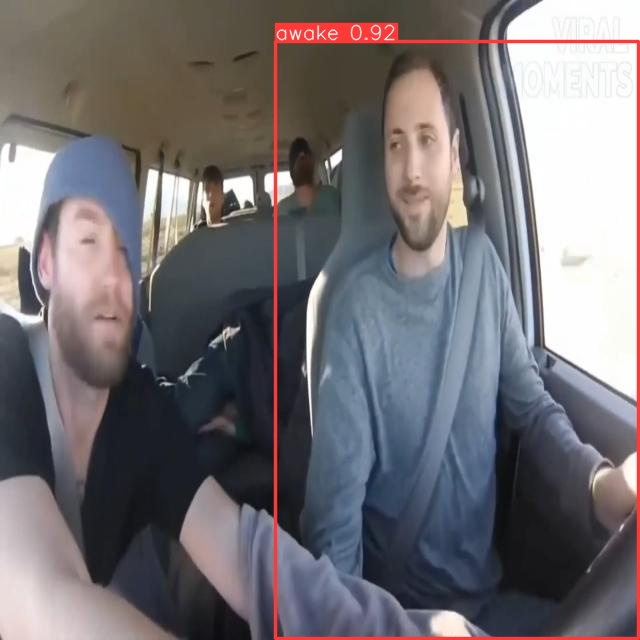

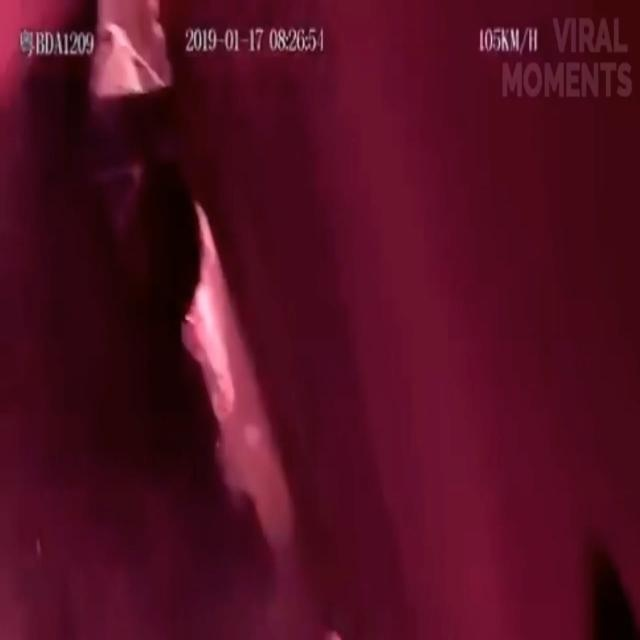

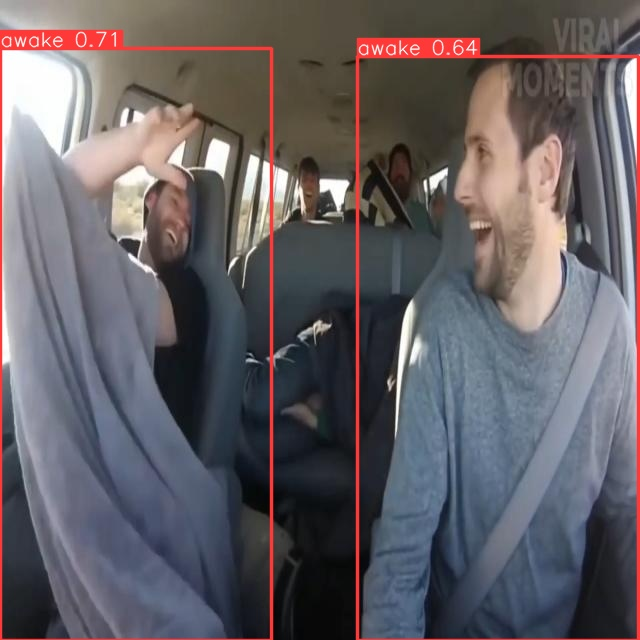

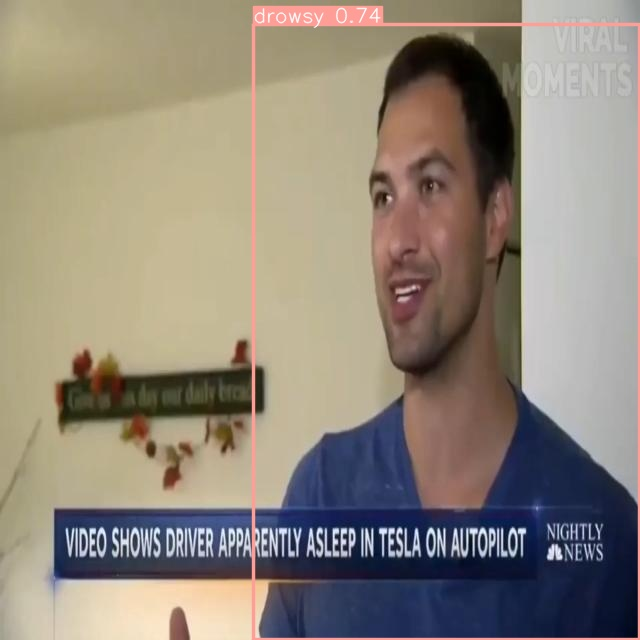

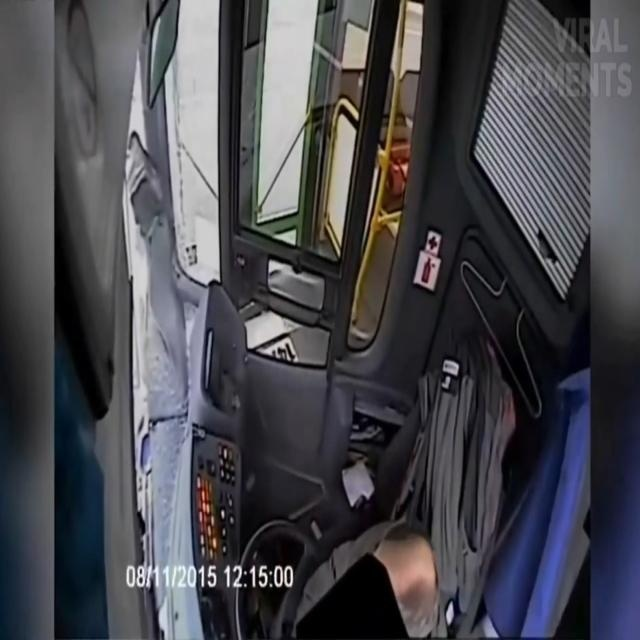

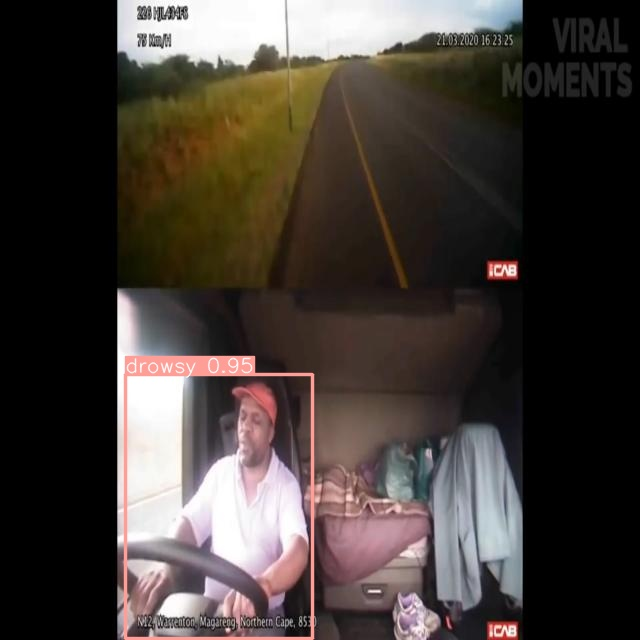

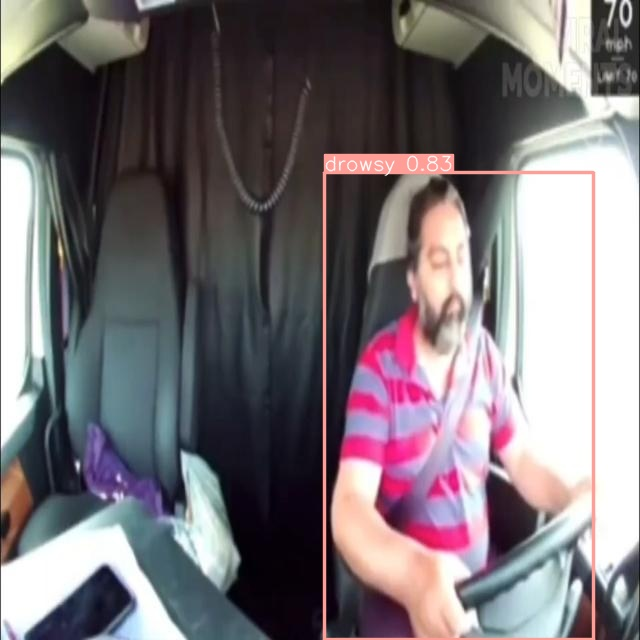

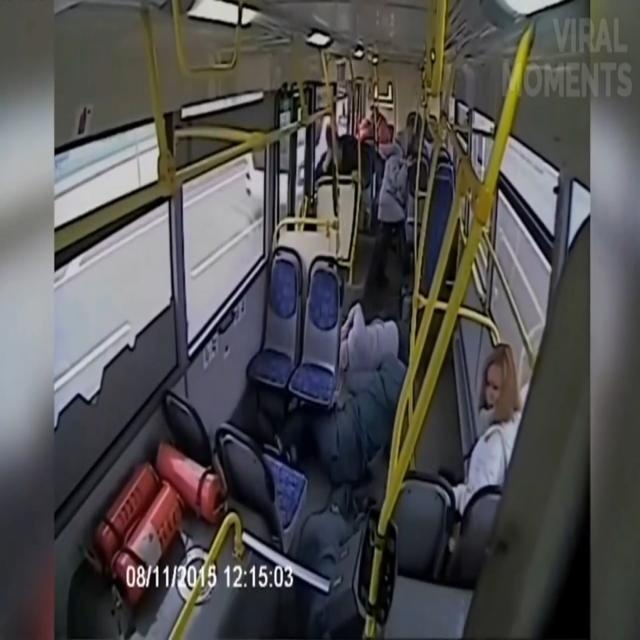

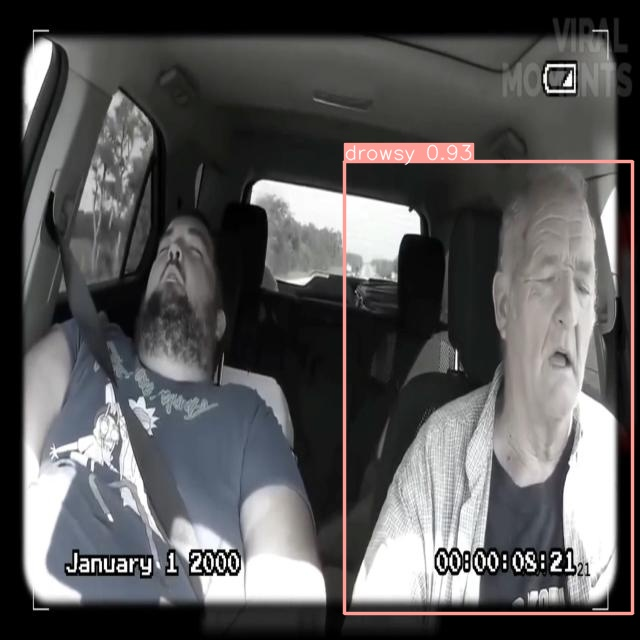

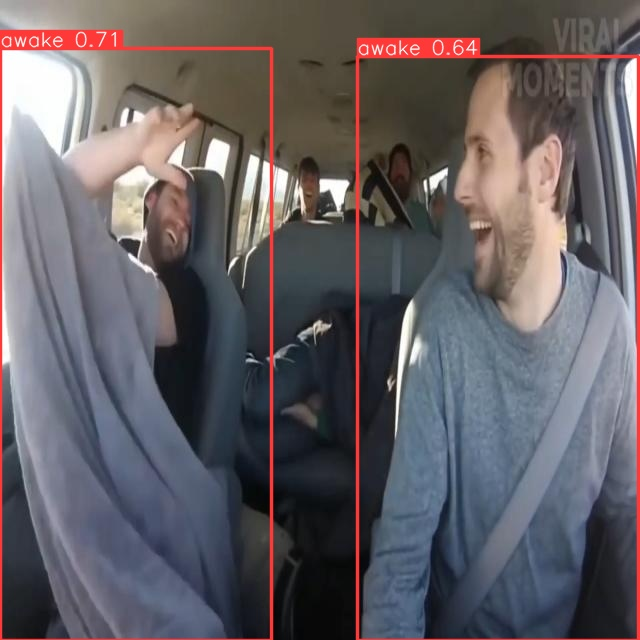

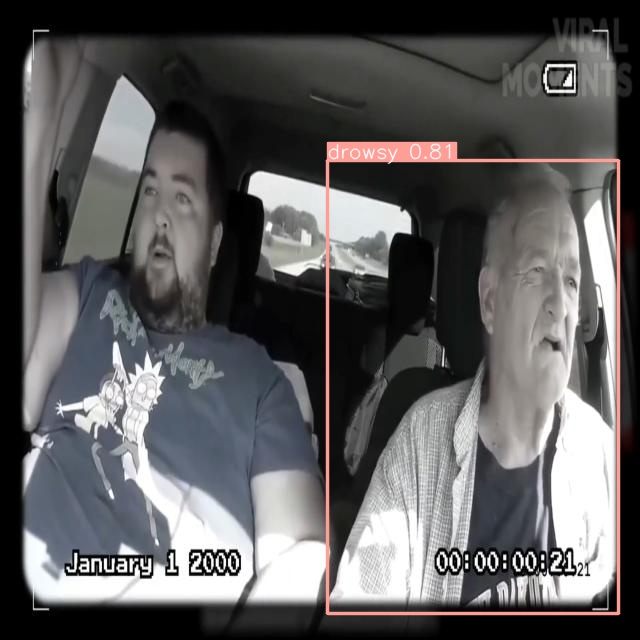

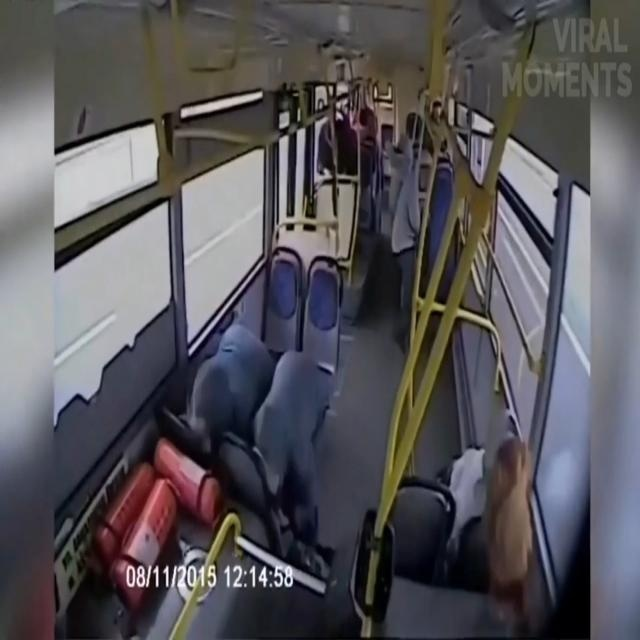

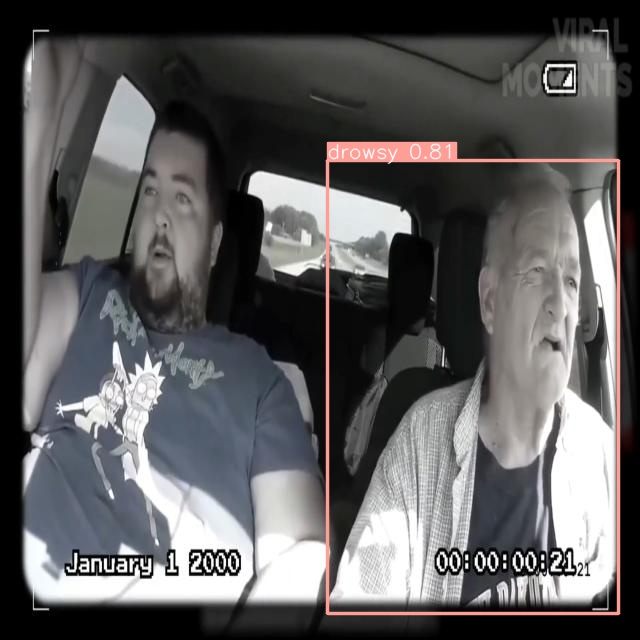

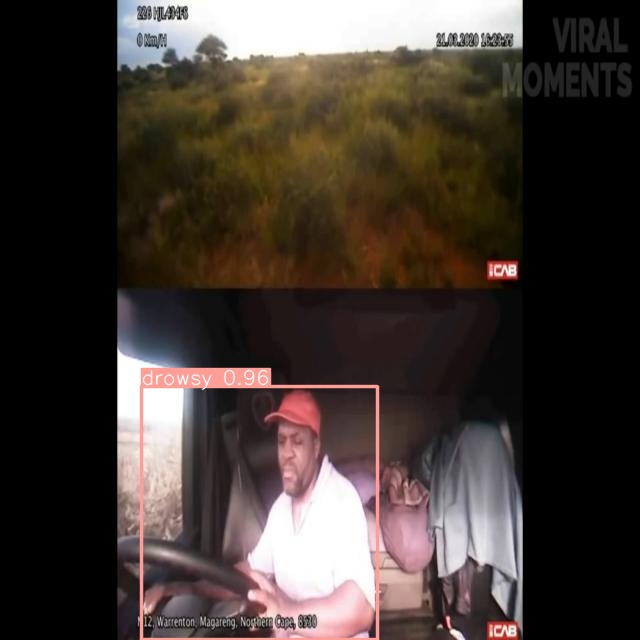

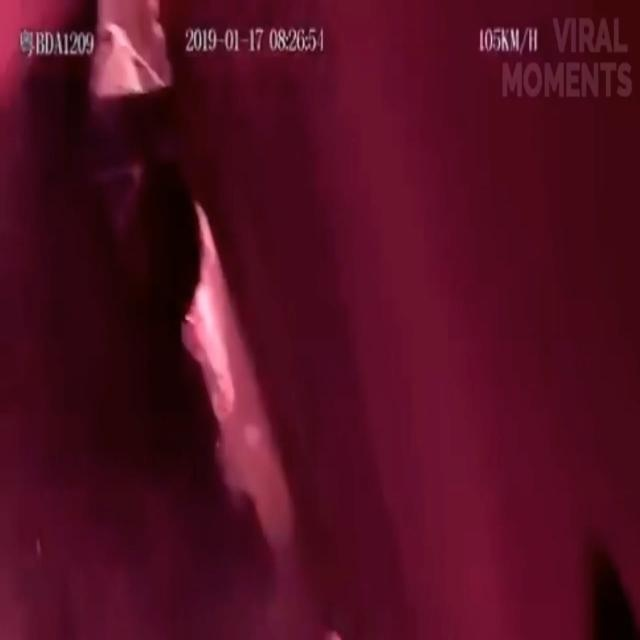

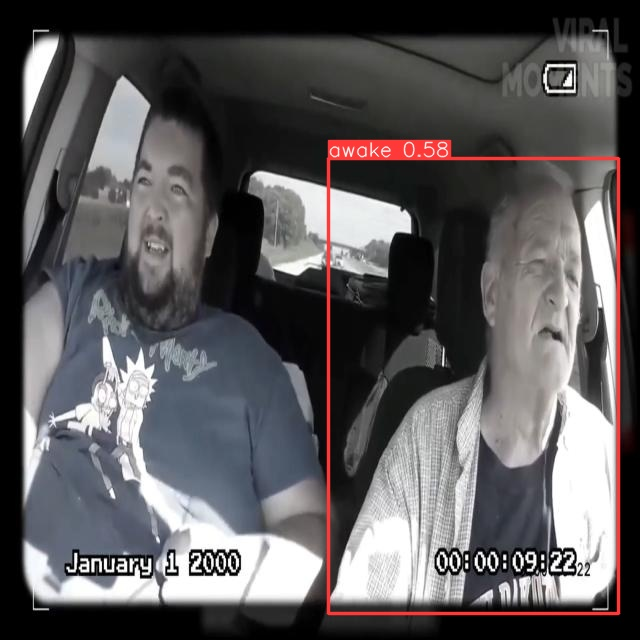

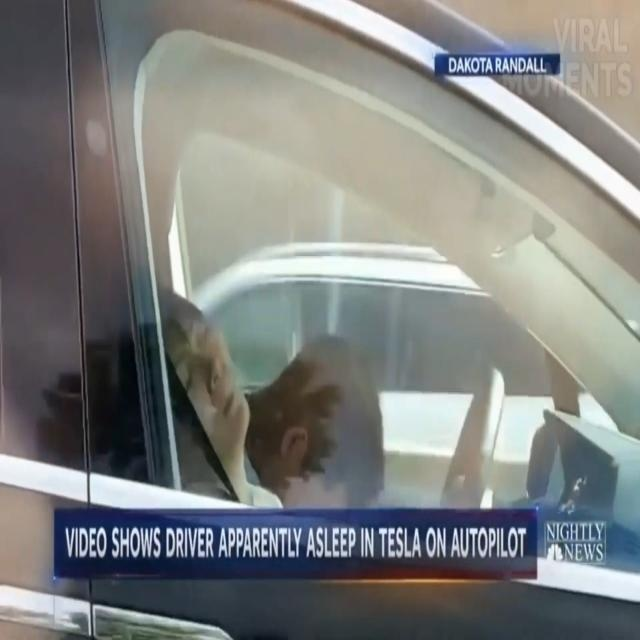

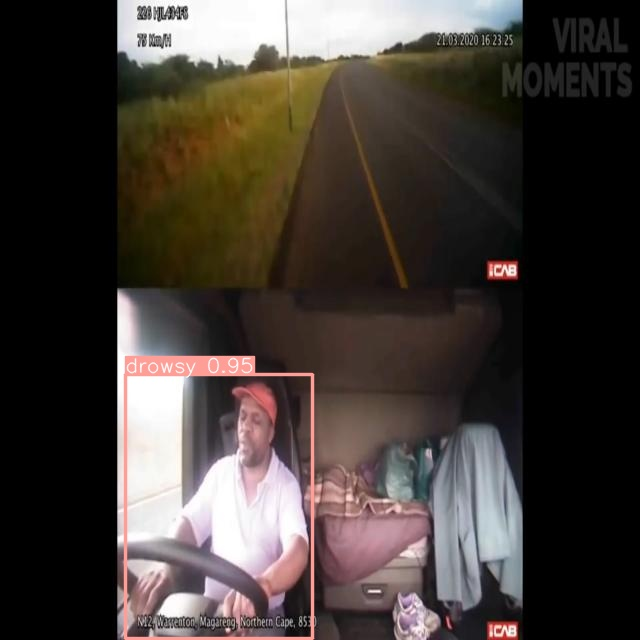

In [18]:
import glob
import random
from IPython.display import Image, display

random.seed(0)
    
predicted_img_paths = glob.glob(f'runs/detect/predict/*.jpg')
chosen_img_paths = [random.choice(predicted_img_paths, ) for _ in range(20)]
for image_path in chosen_img_paths:
    display(Image(filename=image_path, width=600))
    print("\n")